In [3]:
# prompt: git clone
!git clone https://github.com/zclawr/rpg-sentiment-analysis.git

Cloning into 'rpg-sentiment-analysis'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 144 (delta 57), reused 82 (delta 23), pack-reused 0 (from 0)
Receiving objects: 100% (144/144), 2.39 MiB | 4.70 MiB/s, done.
Resolving deltas: 100% (57/57), done.


# Data Exploration

In [4]:
!cd ./rpg-sentiment-analysis/
!ls

rpg-sentiment-analysis	sample_data


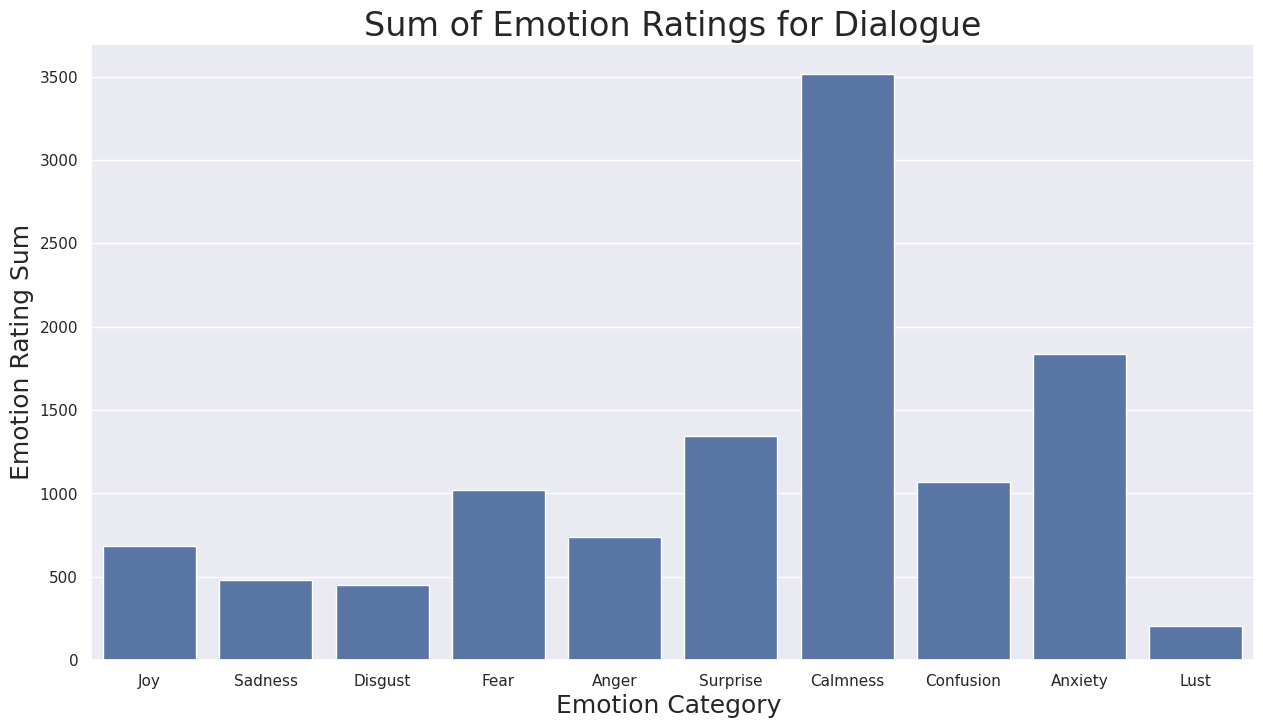

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./rpg-sentiment-analysis/combined_labels.csv')
df.head()

#Need the following:
# num observations
# details about data distributions
# scales
# missing data
# column descriptions
# Explain preprocessing in README

df_emotions = df.drop(columns=['Line', 'Movie', 'Character', 'Dialogue'])
df_emotions.head()
categories = list(df_emotions.columns.values)

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

df_emotions['Joy'] = pd.to_numeric(df_emotions['Joy'], errors='coerce')
df_emotions['Sadness'] = pd.to_numeric(df_emotions['Sadness'], errors='coerce')
df_emotions['Disgust'] = pd.to_numeric(df_emotions['Disgust'], errors='coerce')
df_emotions['Fear'] = pd.to_numeric(df_emotions['Fear'], errors='coerce')
df_emotions['Anger'] = pd.to_numeric(df_emotions['Anger'], errors='coerce')
df_emotions['Surprise'] = pd.to_numeric(df_emotions['Surprise'], errors='coerce')
df_emotions['Calmness'] = pd.to_numeric(df_emotions['Calmness'], errors='coerce')
df_emotions['Confusion'] = pd.to_numeric(df_emotions['Confusion'], errors='coerce')
df_emotions['Anxiety'] = pd.to_numeric(df_emotions['Anxiety'], errors='coerce')
df_emotions['Lust'] = pd.to_numeric(df_emotions['Lust'], errors='coerce')

axes = sns.barplot(x=categories, y=df_emotions.sum().values)

plt.title("Sum of Emotion Ratings for Dialogue", fontsize=24)
plt.ylabel('Emotion Rating Sum', fontsize=18)
plt.xlabel('Emotion Category ', fontsize=18)

plt.show()

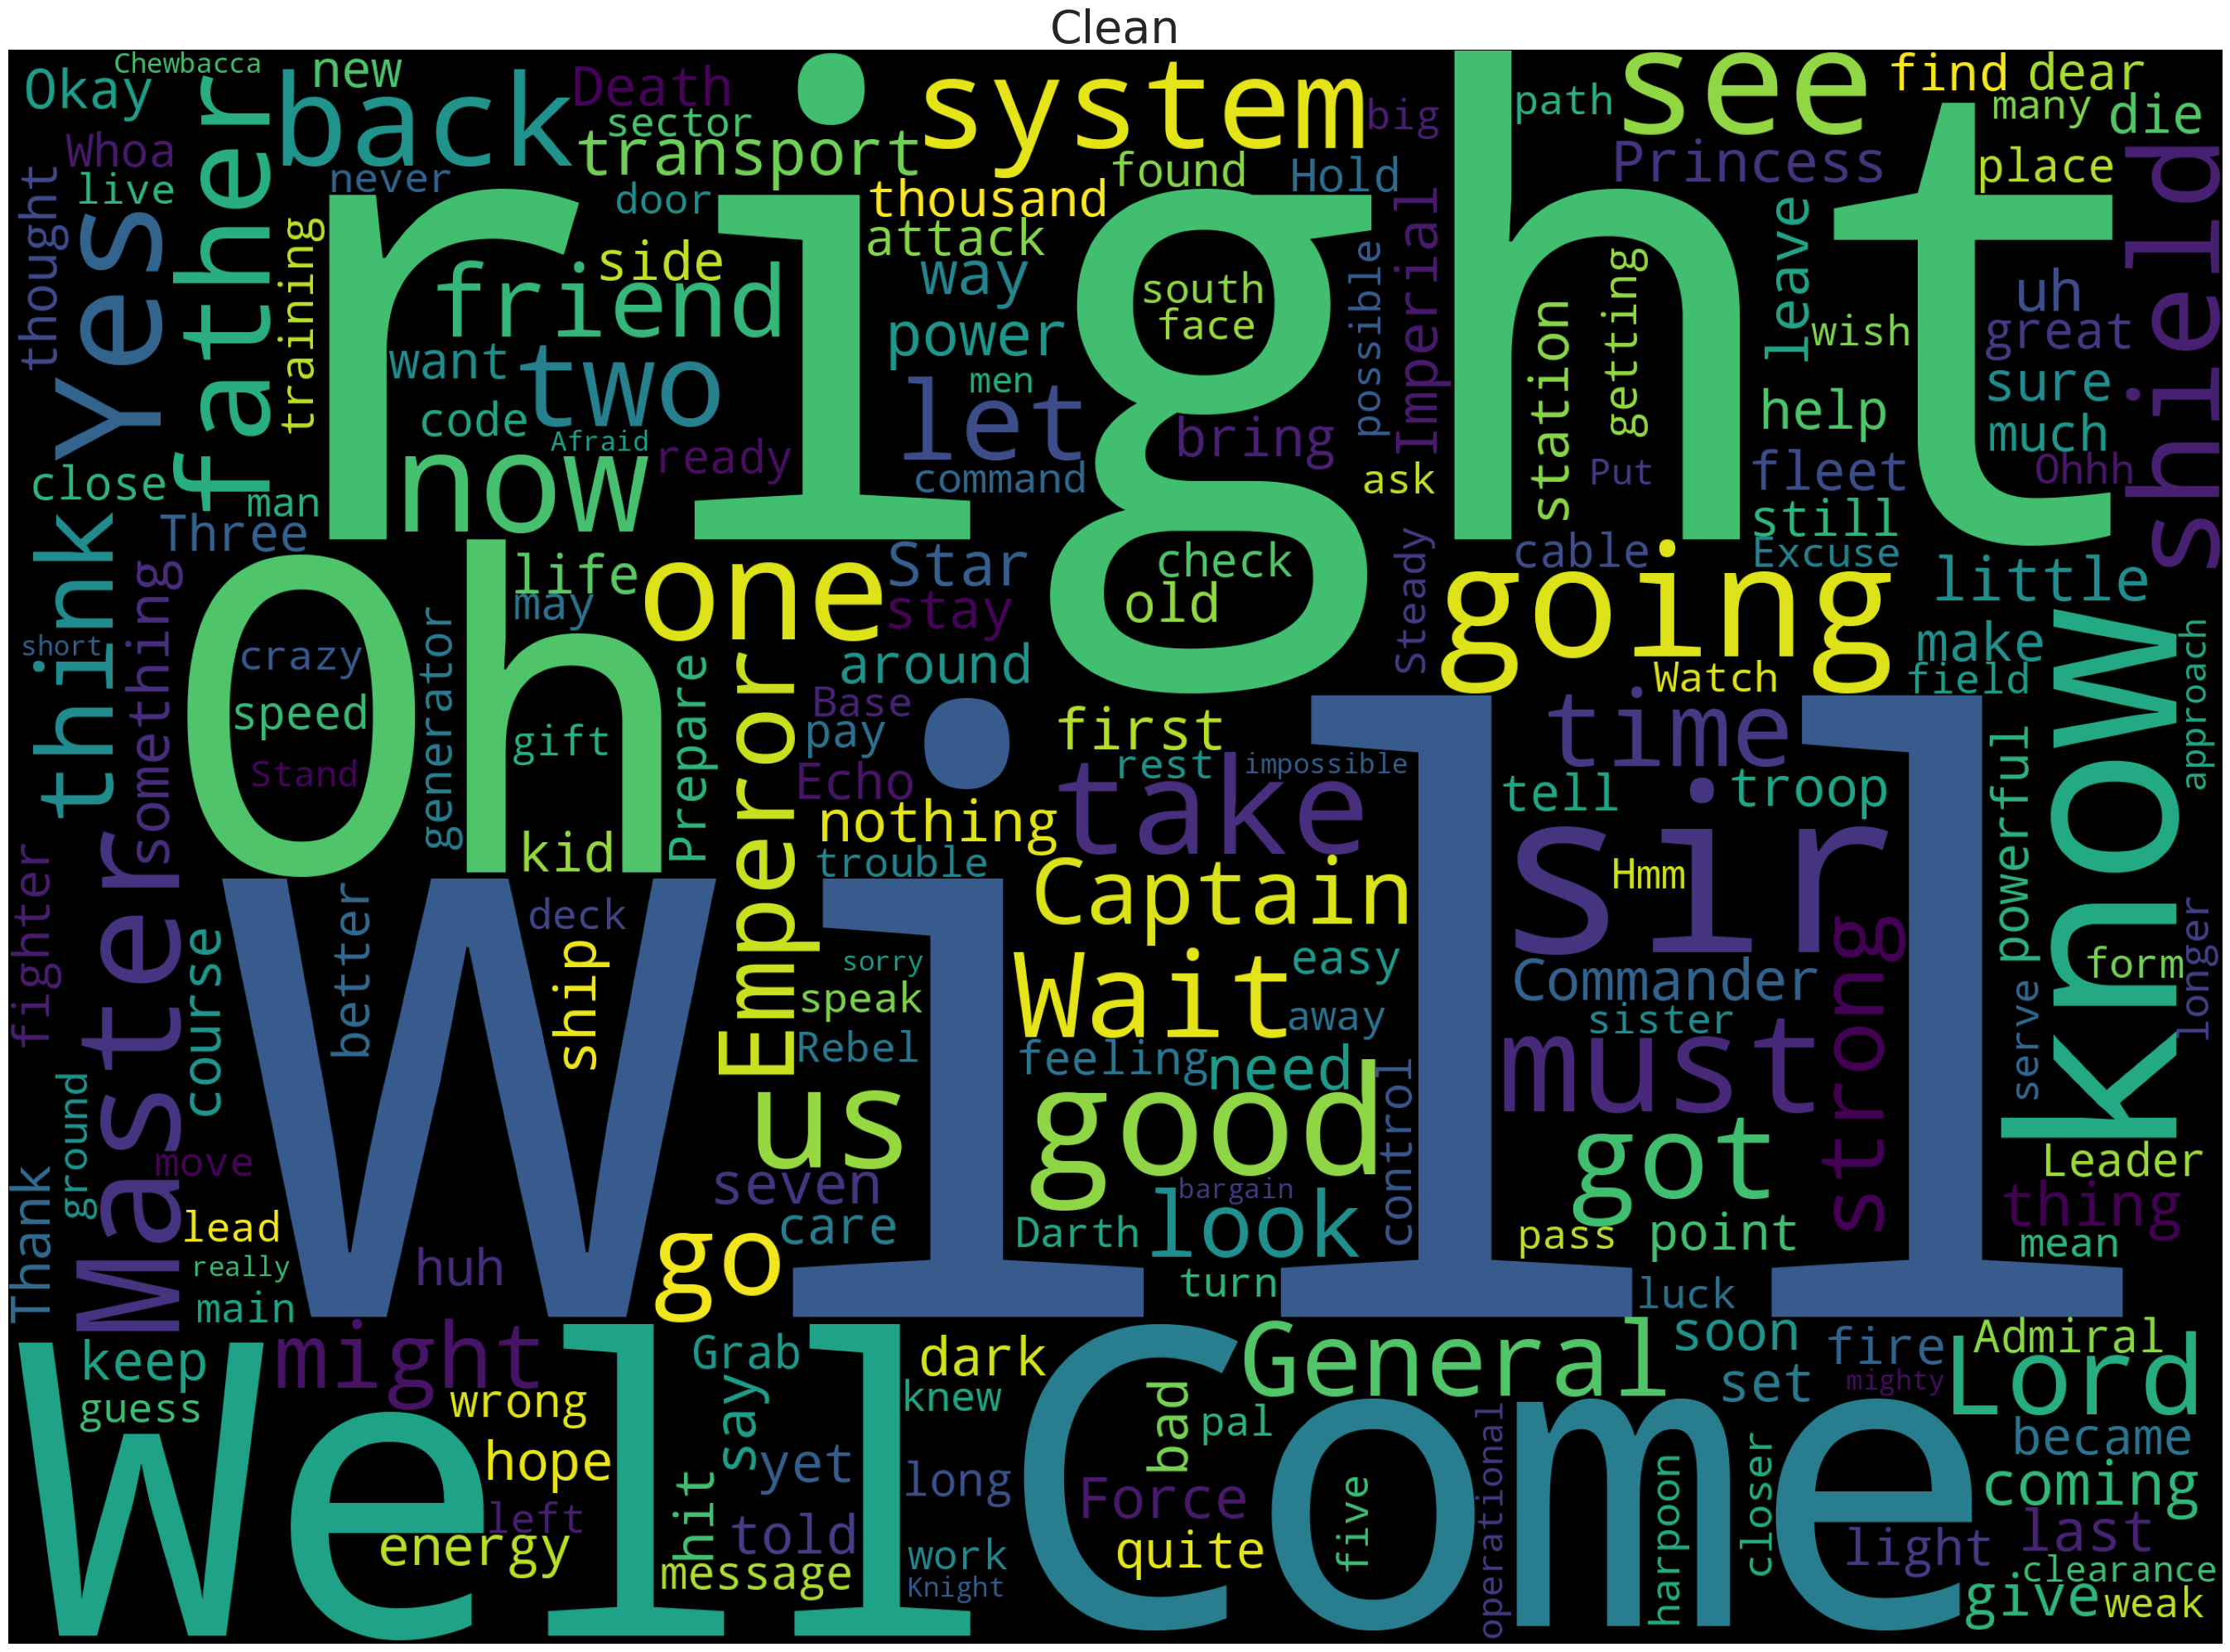

In [6]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))
# clean
subset = df_emotions
stopwords = ['Luke', 'Solo', 'Jabba', 'Yoda', 'Han', 'Wookiee', 'Skywalker', 'Chewie', 'Dagobah', 'Hutt', 'Artoo', 'Threepio', 'Vader', 'Lando', 'Leia', 'Jedi', 'Ben', 'Rouge', 'droid', 'Dack'] + list(STOPWORDS)
text = df['Dialogue'].values
cloud_toxic = WordCloud(
                          stopwords=stopwords,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)


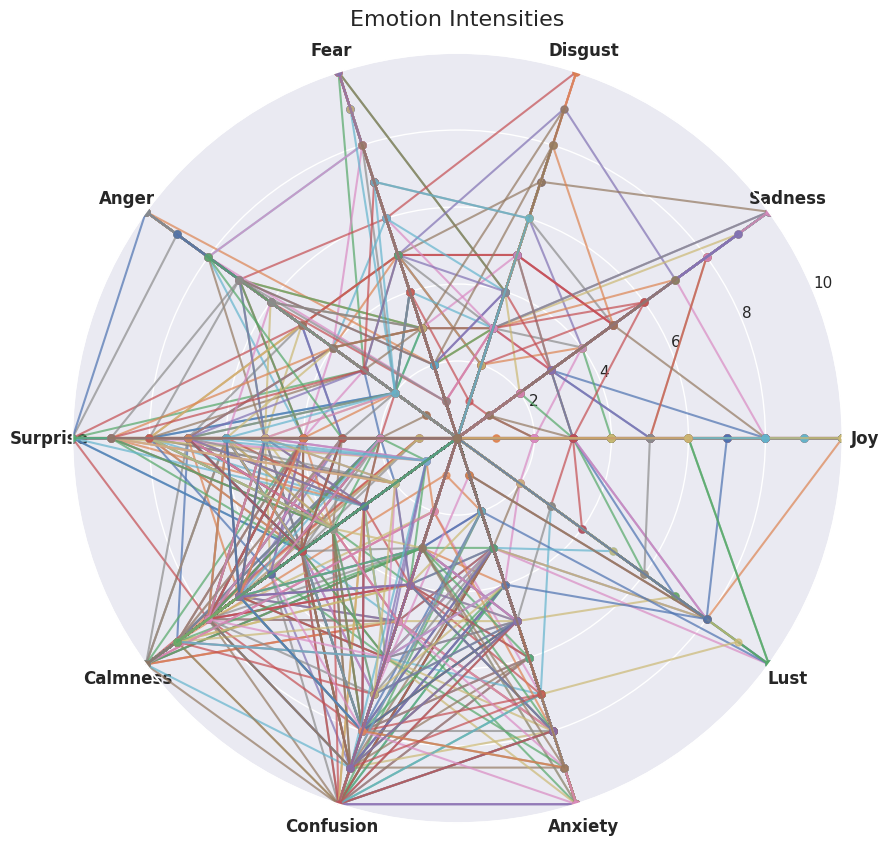

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./rpg-sentiment-analysis/combined_labels.csv')
df_emotions = df.drop(columns=['Line', 'Movie', 'Character', 'Dialogue'])
df_emotions = df_emotions.dropna()

for col in df_emotions.columns:
    df_emotions[col] = pd.to_numeric(df_emotions[col], errors='coerce')
num_emotions = len(list(df_emotions.columns))

angles = np.linspace(0, 2 * np.pi, num_emotions, endpoint=False).tolist()
plt.figure(figsize=(10, 10), dpi=100)
ax = plt.subplot(111, polar=True)

for i in range(len(df)):
    values = df_emotions.iloc[i].values.tolist()
    values += values[:1]
    angle_values = angles + angles[:1]
    ax.plot(angle_values, values, marker='o', linestyle='-', markersize=5, alpha=0.7, label=f'Observation {i+1}')

# showing the emotions around the circle
angles += angles[:1]
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax.set_ylim(0, 10)

plt.title("Emotion Intensities", size=16, pad=20)
plt.show()

# Data Preprocessing

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# apply TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Dialogue'][1:]).toarray()
y = df[['Joy', 'Sadness', 'Disgust', 'Fear', 'Anger', 'Surprise', 'Calmness', 'Confusion', 'Anxiety', 'Lust']].iloc[1:]
y = y.apply(pd.to_numeric, errors='coerce').dropna()

# ensure the shapes are the same
if X.shape[0] > y.shape[0]:
    X = X[:y.shape[0], :]
elif y.shape[0] > X.shape[0]:
    y = y.iloc[:X.shape[0], :]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# min-max normalization so that output is between 0 and 1
y = (y - y.min()) / (y.max() - y.min())
display(y.describe())

# get the mean of each feature
mean_values = y.mean()
print(mean_values)

Shape of X: (584, 1320)
Shape of y: (584, 10)


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.117295,0.082705,0.076884,0.174315,0.126541,0.229795,0.600685,0.182534,0.314212,0.035274
std,0.275019,0.213423,0.190143,0.277253,0.264473,0.328418,0.368809,0.330605,0.341704,0.154816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000,0.200000,0.000000
75%,0.000000,0.000000,0.000000,0.300000,0.000000,0.500000,0.900000,0.300000,0.600000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Joy          0.117295
Sadness      0.082705
Disgust      0.076884
Fear         0.174315
Anger        0.126541
Surprise     0.229795
Calmness     0.600685
Confusion    0.182534
Anxiety      0.314212
Lust         0.035274
dtype: float64


# Training First Model

In [9]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fitting model
rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

predicted_df = pd.DataFrame(y_test_pred, columns=y.columns)

In [10]:
# model evaluation

# Perform k-fold cross-validation (e.g., 5-fold)
from sklearn.model_selection import cross_val_score

k = 5
mse_scores = cross_val_score(rf_model, X, y, cv=k, scoring='neg_mean_squared_error')
mse_scores = -mse_scores
print(f"MSE scores for each fold: {mse_scores}")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Standard Deviation of MSE: {np.std(mse_scores)}")

# show the training mse
train_mse = mean_squared_error(y_train, y_train_pred, multioutput='raw_values')
train_mse_results = dict(zip(y.columns, train_mse))

# show the testing mse
test_mse = mean_squared_error(y_test, y_test_pred, multioutput='raw_values')
test_mse_results = dict(zip(y.columns, test_mse))

eval_df = pd.DataFrame({'Training MSE': train_mse_results, 'Testing MSE': test_mse_results}, index=y.columns)
eval_df['Which is Greater'] = eval_df.apply(lambda row: row.idxmax(), axis=1)
display(eval_df)

MSE scores for each fold: [0.12032912 0.10202786 0.08477991 0.0683645  0.09883799]
Mean MSE: 0.09486787516319949
Standard Deviation of MSE: 0.017432716497048282


,Training MSE,Testing MSE,Which is Greater
Joy,0.014913,0.063421,Testing MSE
Sadness,0.007435,0.046829,Testing MSE
Disgust,0.006578,0.034534,Testing MSE
Fear,0.012238,0.096060,Testing MSE
Anger,0.011528,0.103430,Testing MSE
Surprise,0.017985,0.120433,Testing MSE
Calmness,0.021697,0.199642,Testing MSE
Confusion,0.017411,0.140069,Testing MSE
Anxiety,0.019745,0.136708,Testing MSE
Lust,0.004706,0.024377,Testing MSE


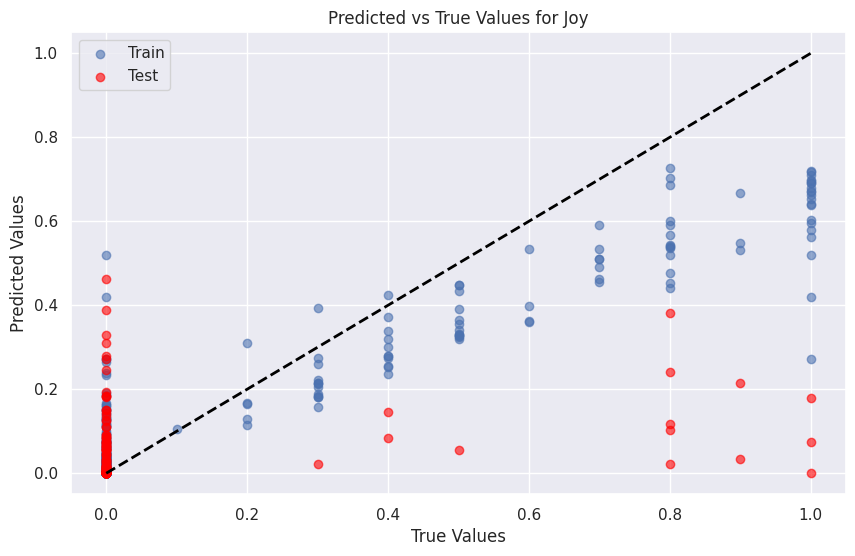

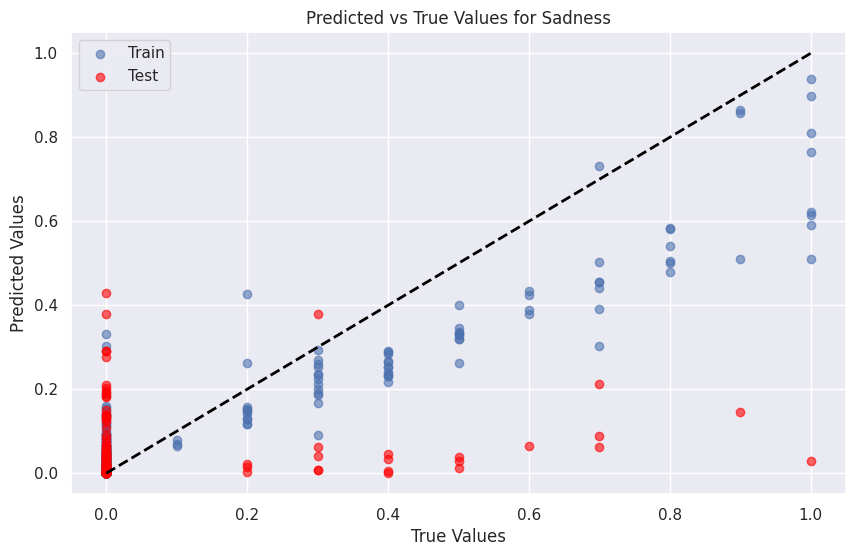

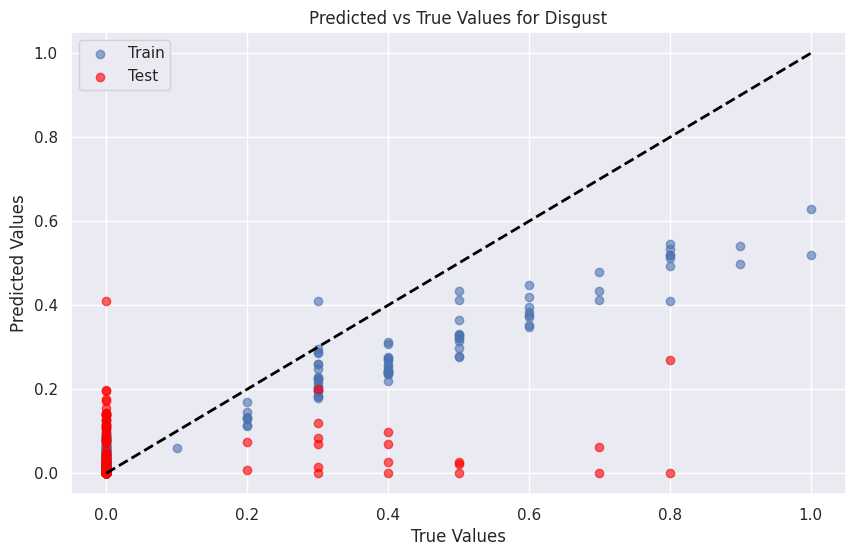

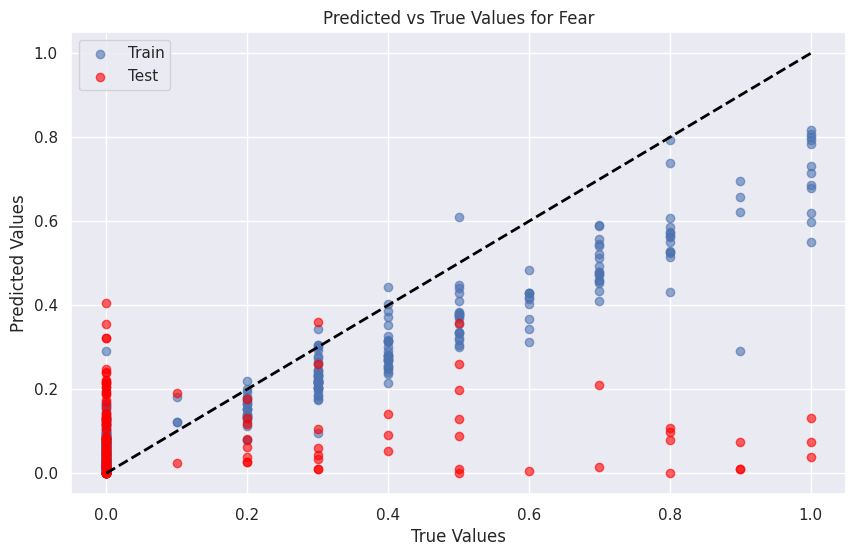

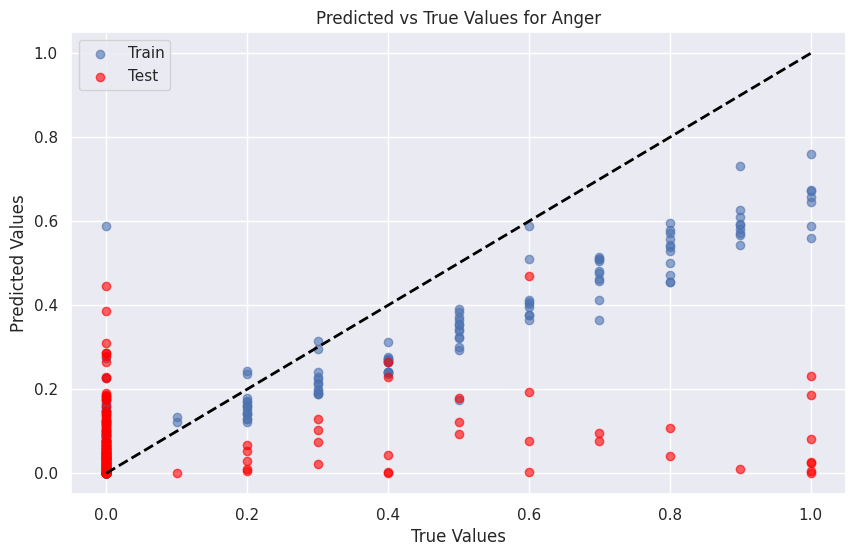

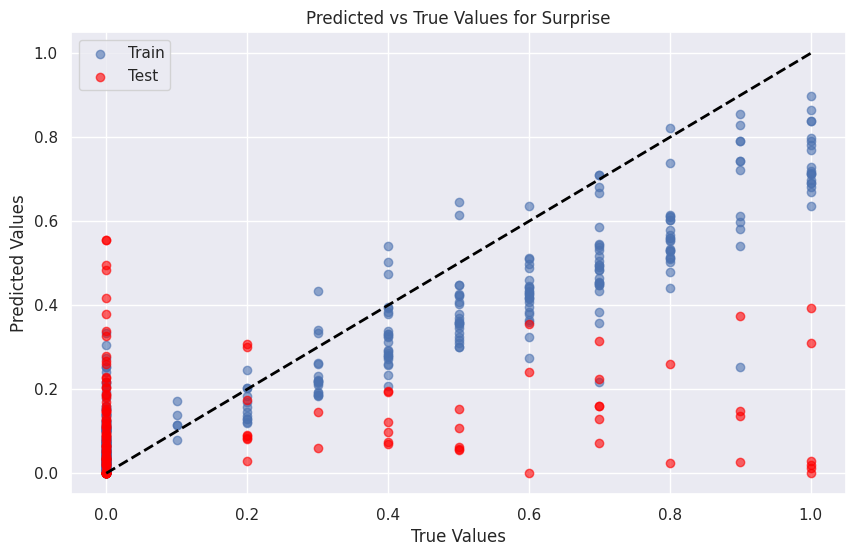

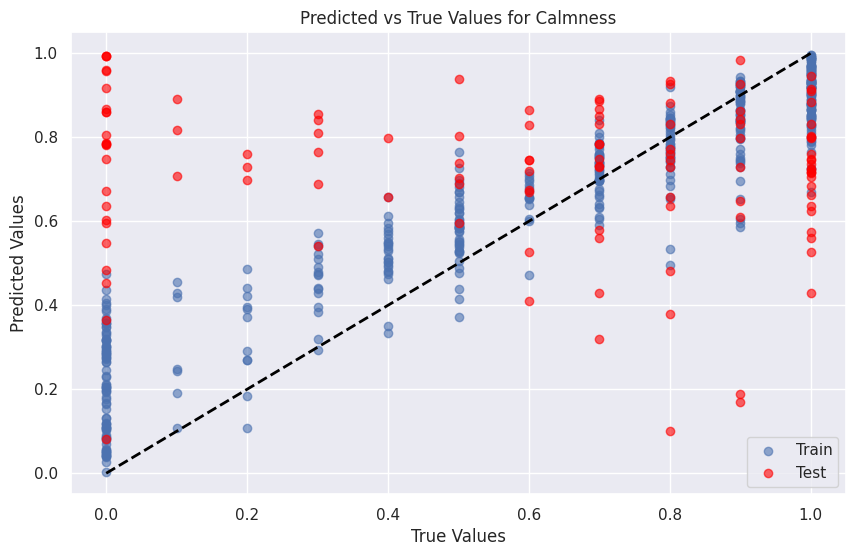

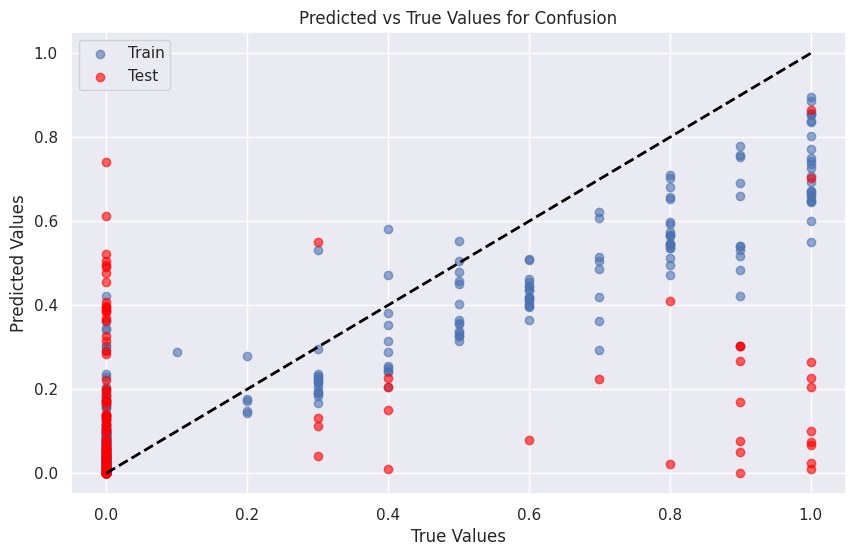

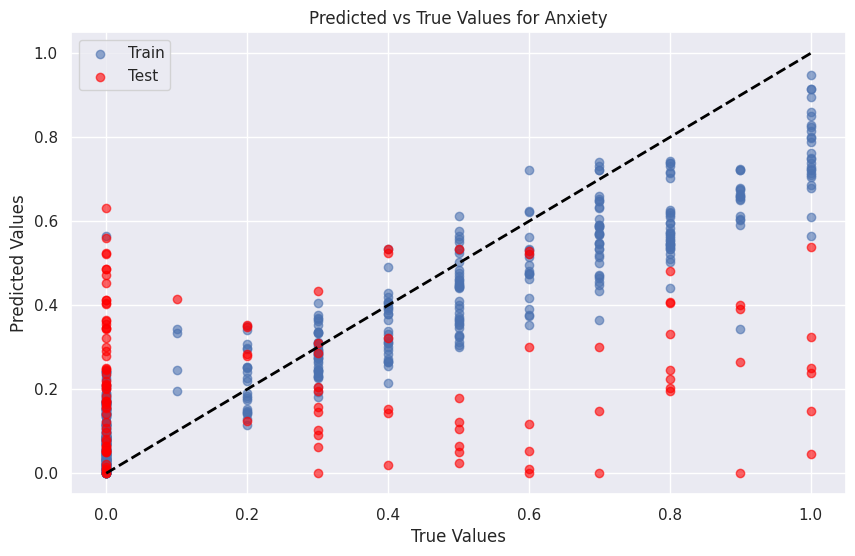

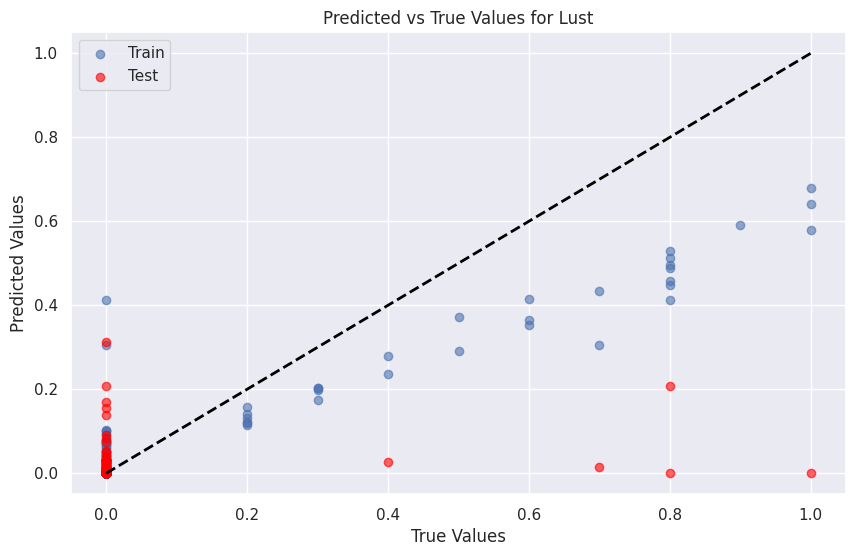

In [11]:
import matplotlib.pyplot as plt

# Loop through each output variable
for i, column in enumerate(y_train.columns):
    plt.figure(figsize=(10, 6))

    # Train predictions
    plt.scatter(y_train[column], rf_model.predict(X_train)[:, i], label="Train", alpha=0.6)

    # Test predictions
    plt.scatter(y_test[column], rf_model.predict(X_test)[:, i], label="Test", alpha=0.6, color="red")

    # y=x line
    plt.plot([y_train[column].min(), y_train[column].max()],
             [y_train[column].min(), y_train[column].max()],
             color="black", linestyle="--", linewidth=2)

    plt.title(f"Predicted vs True Values for {column}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.show()


In [12]:
new_sentence = ["Oh!"]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = rf_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

print("before thresholding:")
display(predicted_df)
print()

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

print("after thresholding:")
display(predicted_df)

before thresholding:


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
0,0.36,0.0,0.048,0.181,0.0,0.732,0.295,0.033,0.275,0.0



after thresholding:


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
0,0.242705,0.0,0.0,0.006685,0.0,0.502205,0.0,0.0,0.0,0.0


In [13]:
'''
Oversampling can help improve model performance, especially in cases where you have imbalanced data—meaning
that certain emotion intensities or emotions (e.g., high levels of "Fear" or "Calmness") are underrepresented compared to others.
'''

# implement oversampling

'\nOversampling can help improve model performance, especially in cases where you have imbalanced data—meaning\nthat certain emotion intensities or emotions (e.g., high levels of "Fear" or "Calmness") are underrepresented compared to others.\n'